In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_result = pd.read_csv("gender_submission.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


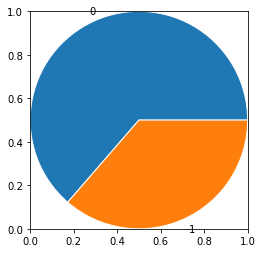

In [37]:
fig, ax = plt.subplots()
ax.pie(test_result.groupby('Survived').count()['PassengerId'], radius=0.5,center=[0.5,0.5] ,labels = [0,1],wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True )
plt.show()

In [10]:
final_df['Cabin'].isnull().sum()

687

### Since most of the enteries in Cabin column is Null, so dropping it for detection purpose, also Name, PassengerId, Embarked, Ticket play no role in survival of people, so dropping it as well.

In [69]:
final_df=train_df.drop(['Survived','Name','Cabin','PassengerId','Embarked','Ticket'],axis=1,inplace=False)
final_test=test_df.drop(['Name','Cabin','PassengerId','Embarked','Ticket'],axis=1,inplace=False)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

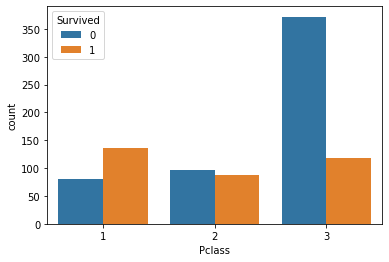

In [21]:
sns.countplot(x='Pclass', data=train_df, hue='Survived')


The above graph shows that passenger of class 3 had least survival ratio. So, it may play important role in predicting

<AxesSubplot:xlabel='Sex', ylabel='count'>

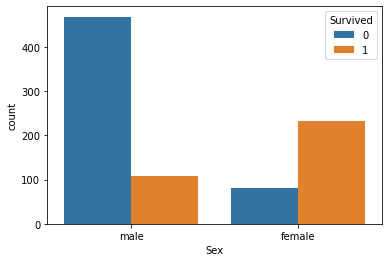

In [22]:
sns.countplot(x='Sex', data=train_df, hue='Survived')

Greater number of female survived as compared to males

<AxesSubplot:xlabel='SibSp', ylabel='count'>

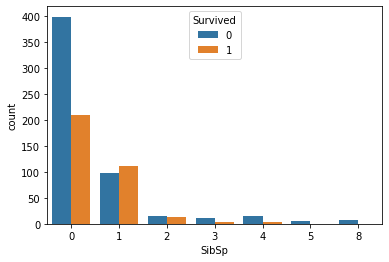

In [27]:
sns.countplot(x='SibSp', data=train_df, hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

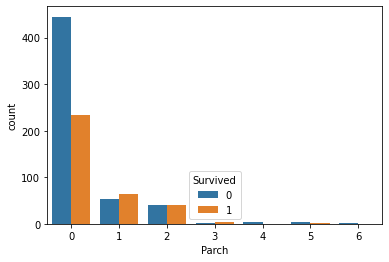

In [28]:
sns.countplot(x='Parch', data=train_df, hue='Survived')

In [71]:
number = LabelEncoder()

final_df['Sex'] = number.fit_transform(final_df['Sex'].astype('str'))
final_df['Sex'] = number.fit_transform(final_df['Sex'].astype('str'))
final_df['Age'][final_df['Age'].isnull()] = round(np.mean(final_df['Age']), 2)
final_df['Fare'][final_df['Fare'].isnull()] = round(np.mean(final_df['Fare']), 2)

final_test['Sex'] = number.fit_transform(final_test['Sex'].astype('str'))
final_test['Sex'] = number.fit_transform(final_test['Sex'].astype('str'))
final_test['Age'][final_test['Age'].isnull()] = round(np.mean(final_test['Age']), 2)
final_test['Fare'][final_test['Fare'].isnull()] = round(np.mean(final_test['Fare']), 2)

In [73]:
print(final_df.isnull().sum())
print(final_test.isnull().sum())

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64
Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [48]:
final_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [76]:
x_train=StandardScaler().fit_transform(final_df)
final_test=StandardScaler().fit_transform(final_test)
y_train=train_df['Survived']

In [55]:
type(y_train)

pandas.core.series.Series

In [56]:
y_train=y_train.to_frame()

# Creating Model

In [62]:
import keras
import tensorflow as tf

In [63]:
model=keras.Sequential([
    keras.layers.Dense(6,activation=tf.nn.relu, input_shape=[6]),
    keras.layers.Dense(8,activation=tf.nn.relu),
    keras.layers.Dense(1,activation='relu')
    ])

# Training

In [65]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
28/28 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.7834
Epoch 2/50
28/28 [==============================] - 0s 1ms/step - loss: 0.5307 - accuracy: 0.7883
Epoch 3/50
28/28 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7992
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7924
Epoch 5/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7960
Epoch 6/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.7931
Epoch 7/50
28/28 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7910
Epoch 8/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.8045
Epoch 9/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.7730
Epoch 10/50
28/28 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.7880
Epoch 11/50
28/28 [

In [79]:
y_pred=model.predict(final_test).astype(int)

In [80]:
test_df['Survived'] = y_pred
solution = test_df[['PassengerId', 'Survived']]
solution.to_csv('submission.csv', index=False)

solution.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
